In [125]:
import pandas as pd
import numpy as np
from sklearn import model_selection, svm, preprocessing
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('diamonds.csv')
print(df['color'].unique().tolist())
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())


['E', 'I', 'J', 'H', 'F', 'G', 'D']
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [112]:
cut_conversions = {
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Premium':4,
    'Ideal':5
}


clarity_conversions = {
    'I1':1,
    'S12':2,
    'SI1':3,
    'VS2':4,
    'VS1':5,
    'VVS2':6,
    'VVS1':7,
    'IF':8,
}


color_conversions = {
    'J':1,
    'I':2,
    'H':3,
    'G':4,
    'F':5,
    'E':6,
    'D':7
}

df['cut'] = df['cut'].map(cut_conversions)
df['clarity'] = df['clarity'].map(clarity_conversions)
df['color'] = df['color'].map(color_conversions)


In [113]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,5,7,3.0,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,2,7,3.0,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,3,7,3.0,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,4,3,NaN,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,5,7,NaN,62.2,55.0,2757,5.83,5.87,3.64


In [119]:
df.replace(np.nan,0,inplace=True)
X = df.drop(['price'],axis=1).values
X = preprocessing.scale(X)
y = df['price'].values



X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


clf = svm.SVR(kernel='linear')
fit = clf.fit(X_train,y_train)


In [120]:
clf.score(X_test,y_test)

0.8665753175431467

In [128]:
x_s= []
y_s = []
for X,y in zip(X_test,y_test):
    prediction = clf.predict([X])[0]
    x_s.append(prediction)
    y_s.append(y)


Text(0, 0.5, 'Actual Price')

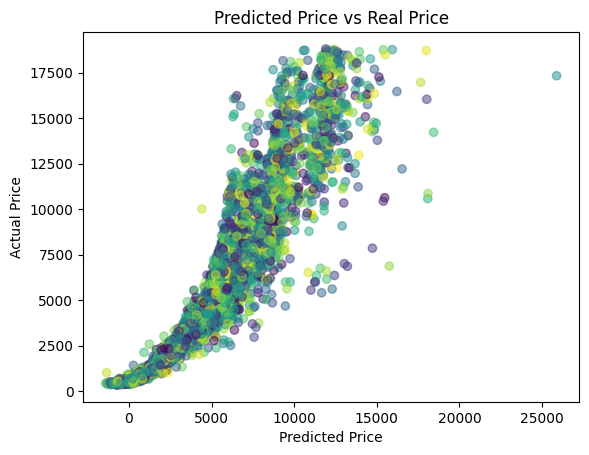

In [131]:
colors = np.random.rand(len(x_s))


plt.scatter(x_s,y_s,alpha=0.5, c=colors)
plt.title('Predicted Price vs Real Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
